# **TITLE**

## **Import Library**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

## **Import Data**

In [2]:
df = pd.read_csv('ibm data.csv')

### Data Type Check (David)


In [7]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
560,34,No,Travel_Rarely,167,Research & Development,8,5,Life Sciences,1,775,...,3,80,1,7,3,3,0,0,0,0
1135,46,No,Travel_Rarely,563,Sales,1,4,Life Sciences,1,1602,...,2,80,0,27,5,1,26,0,0,12
1448,41,No,Travel_Rarely,930,Sales,3,3,Life Sciences,1,2037,...,3,80,1,14,5,3,5,4,0,4
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,...,3,80,1,25,2,3,1,0,0,0
364,37,No,Travel_Rarely,921,Research & Development,10,3,Medical,1,486,...,2,80,1,17,3,3,5,4,0,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Note:**  
Datatype masing-masing feature sudah sesuai

### Duplicates Handling (David)

In [11]:
df.duplicated().any()

False

**Note:**  
Data sudah bersih dari nilai duplikat

### Missing Values Handling (Reza)

## **Data Understanding / EDA**

### Descriptive Statistics (Reza)

### Univariate Analysis (Reza)

### Multivariate Analysis (Reza)

### Feature Selection (Gibran)

In [3]:
# Cek proporsi attrition
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100

# Hitung nilai rata-rata dari beberapa fitur penting untuk dua grup: Attrition = Yes dan No
risk_factors = df.groupby('Attrition')[[
    'Age', 'MonthlyIncome', 'DistanceFromHome', 'TotalWorkingYears',
    'YearsAtCompany', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'JobSatisfaction', 'JobInvolvement',
    'WorkLifeBalance', 'OverTime'
]].agg(lambda x: x.mode()[0] if x.dtype == 'O' else x.mean()).reset_index()

risk_factors

,Attrition,Age,MonthlyIncome,DistanceFromHome,TotalWorkingYears,YearsAtCompany,EnvironmentSatisfaction,RelationshipSatisfaction,JobSatisfaction,JobInvolvement,WorkLifeBalance,OverTime
0,No,37.561233,6832.739659,8.915653,11.862936,7.369019,2.771290,2.733982,2.778589,2.770479,2.781022,No
1,Yes,33.607595,4787.092827,10.632911,8.244726,5.130802,2.464135,2.599156,2.468354,2.518987,2.658228,Yes


| Fitur                   | Tetap (No)         | Keluar (Yes)  | Insight Risiko                                |
| ----------------------- | ------------------ | ------------- | --------------------------------------------- |
| **Umur**                | 37.6 tahun         | 33.6 tahun    | Karyawan lebih muda cenderung keluar          |
| **Gaji Bulanan**        | \$6.832            | \$4.787       | Gaji lebih rendah berisiko lebih tinggi       |
| **Jarak dari Rumah**    | 8.9 km             | 10.6 km       | Jarak lebih jauh → lebih rentan               |
| **Total Working Years** | 11.9 tahun         | 8.2 tahun     | Pengalaman kerja lebih sedikit → lebih rentan |
| **Years At Company**    | 7.4 tahun          | 5.1 tahun     | Masa kerja lebih pendek = risiko keluar naik  |
| **Env. Satisfaction**   | 2.77               | 2.46          | Kepuasan lingkungan kerja lebih rendah        |
| **Rel. Satisfaction**   | 2.73               | 2.6           | Kepuasan relasi kerja lebih rendah            |
| **Job Satisfaction**    | 2.78               | 2.47          | Kepuasan kerja lebih rendah                   |
| **Job Involvement**     | 2.78               | 2.51          | Keterlibatan kerja lebih rendah               |
| **Work-Life Balance**   | 2.78               | 2.66          | Keseimbangan kerja lebih rendah               |
| **OverTime**            | No                 | Yes           | Lembur tinggi berhubungan dengan attrition    |


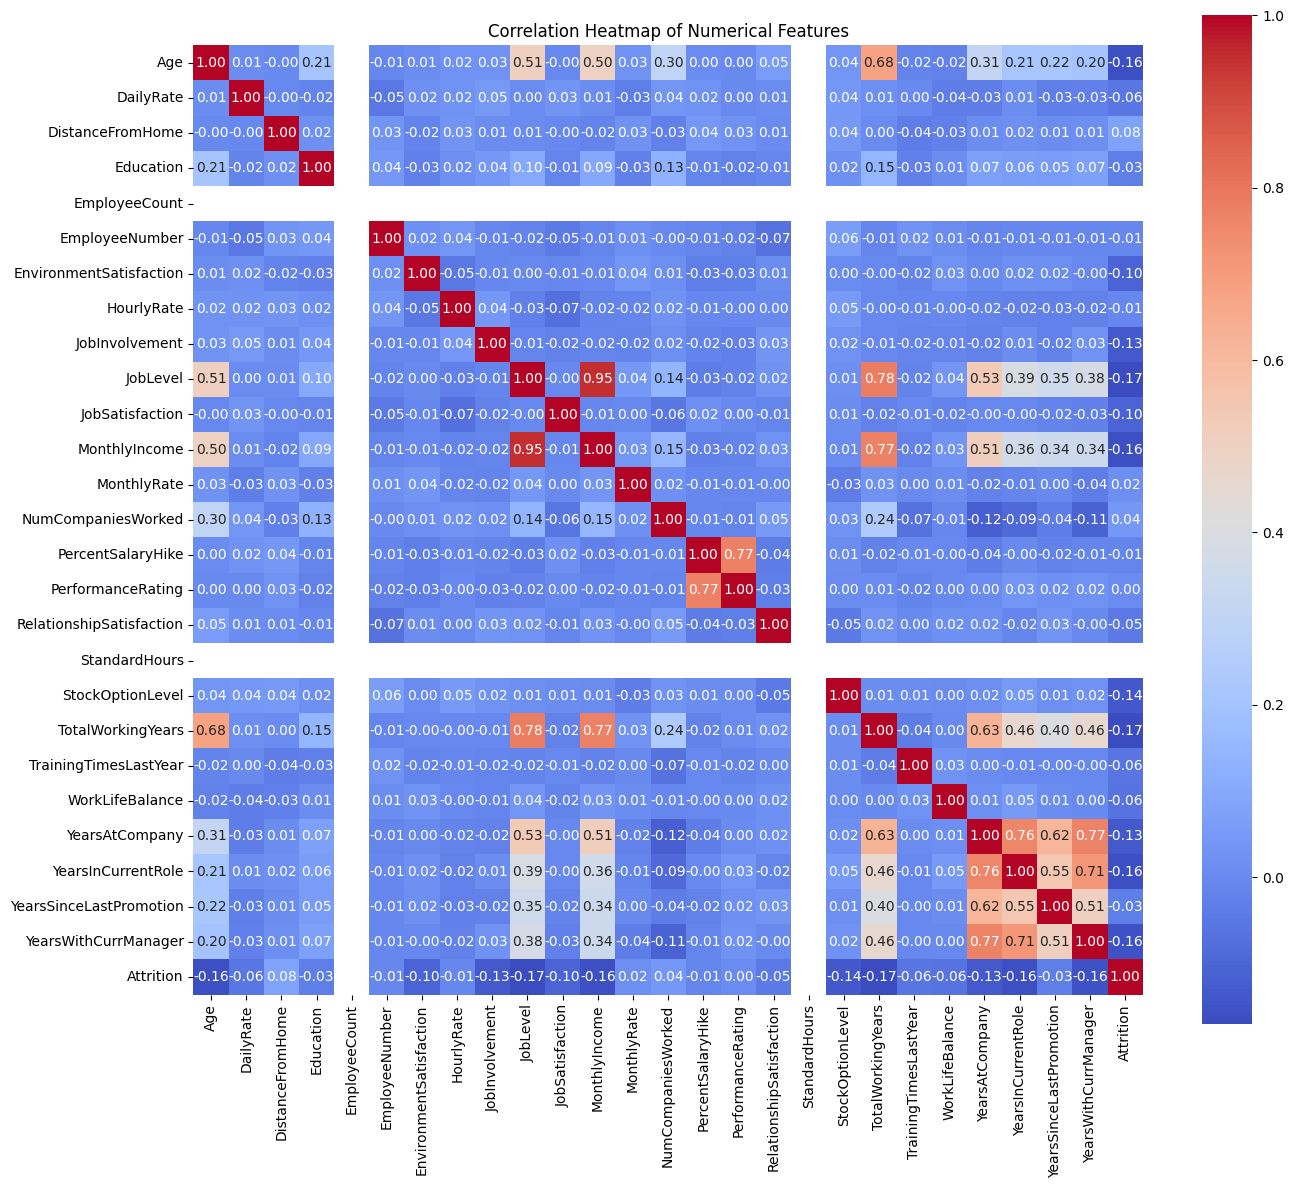

In [4]:
# Select numeric columns and map Attrition
df_numerik = df.select_dtypes(include=['int64', 'float64']).copy()
df_numerik['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Compute correlation matrix
corr_matrix = df_numerik.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [14]:
# Konversi kolom 'Attrition' menjadi numerik
if df['Attrition'].dtype == 'object':
    df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

if 'Attrition' in df.columns:
    target_corr = df.select_dtypes(include=[np.number]).corr()['Attrition'].sort_values(ascending=True)
    target_corr = target_corr.drop('Attrition', errors='ignore')  # Ignore error if 'Attrition' is missing

    print("\nFeature Importance Analysis:")
    print("   Top 15 features by correlation with target:")
    for i, (feature, corr) in enumerate(target_corr.head(15).items(), 1):
        print(f"   {i:2d}. {feature:25s}: {corr:.4f}")
else:
    print("Kolom 'Attrition' tidak ditemukan di DataFrame.")


if 'Attrition' in df.columns:
    target_corr = df.select_dtypes(include=[np.number]).corr()['Attrition'].sort_values(ascending=False)
    target_corr = target_corr.drop('Attrition', errors='ignore')  # Ignore error if 'Attrition' is missing

    print("\nFeature Importance Analysis:")
    print("   Top 15 features by correlation with target:")
    for i, (feature, corr) in enumerate(target_corr.head(15).items(), 1):
        print(f"   {i:2d}. {feature:25s}: {corr:.4f}")
else:
    print("Kolom 'Attrition' tidak ditemukan di DataFrame.")


Feature Importance Analysis:
   Top 15 features by correlation with target:
    1. TotalWorkingYears        : -0.1711
    2. JobLevel                 : -0.1691
    3. YearsInCurrentRole       : -0.1605
    4. MonthlyIncome            : -0.1598
    5. Age                      : -0.1592
    6. YearsWithCurrManager     : -0.1562
    7. StockOptionLevel         : -0.1371
    8. YearsAtCompany           : -0.1344
    9. JobInvolvement           : -0.1300
   10. JobSatisfaction          : -0.1035
   11. EnvironmentSatisfaction  : -0.1034
   12. WorkLifeBalance          : -0.0639
   13. TrainingTimesLastYear    : -0.0595
   14. DailyRate                : -0.0567
   15. RelationshipSatisfaction : -0.0459

Feature Importance Analysis:
   Top 15 features by correlation with target:
    1. DistanceFromHome         : 0.0779
    2. NumCompaniesWorked       : 0.0435
    3. MonthlyRate              : 0.0152
    4. PerformanceRating        : 0.0029
    5. HourlyRate               : -0.0068
    6. Emp

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur numerik dan target
X = df.select_dtypes(include=['number']).drop(columns=['Attrition'], errors='ignore')  # Ambil hanya kolom numerik
y = df['Attrition']  # Konversi target ke numerik jika perlu

# Buat model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Ambil feature importance
feature_importances = model.feature_importances_

# Buat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan hasil
importance_df

,Feature,Importance
11,MonthlyIncome,0.081848
0,Age,0.070337
1,DailyRate,0.067538
5,EmployeeNumber,0.063695
12,MonthlyRate,0.059189
7,HourlyRate,0.057053
19,TotalWorkingYears,0.056323
2,DistanceFromHome,0.055235
13,NumCompaniesWorked,0.043820
22,YearsAtCompany,0.042487


### Feature Engineering (Gibran)

## **Data Preparation / Preprocessing**

### Data Splitting (Erick)

In [27]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1176, 34)
X_test shape: (294, 34)
y_train shape: (1176,)
y_test shape: (294,)


### Outlier Handling (Erick)

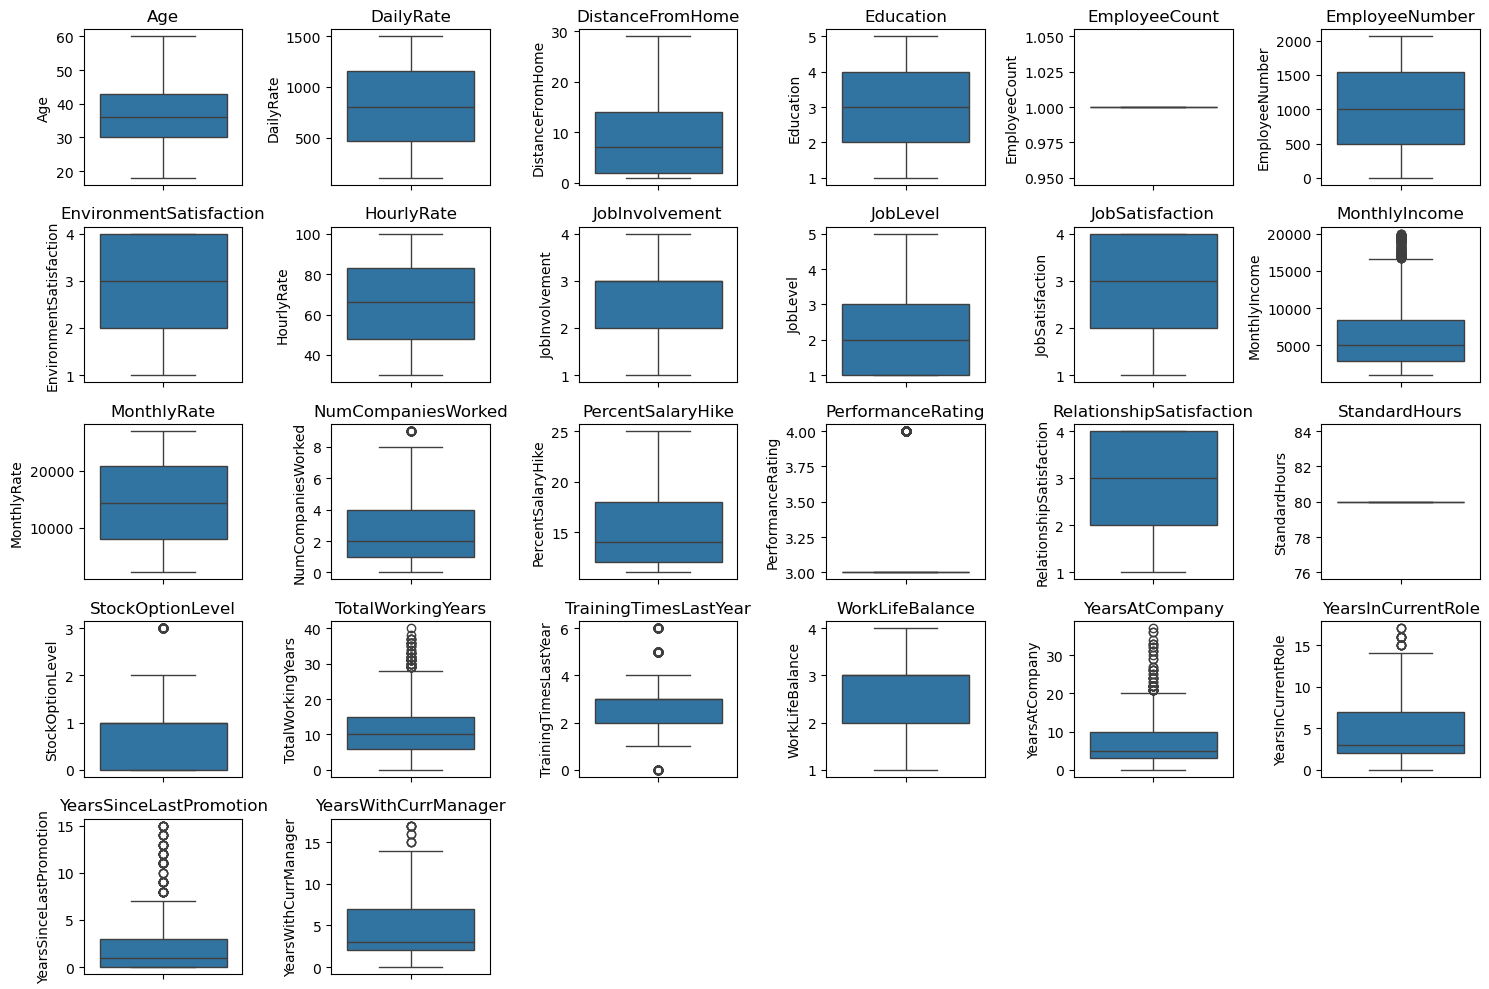

In [30]:
numerical_cols = X_train.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [31]:
# Handle Outliers
for col in numerical_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)

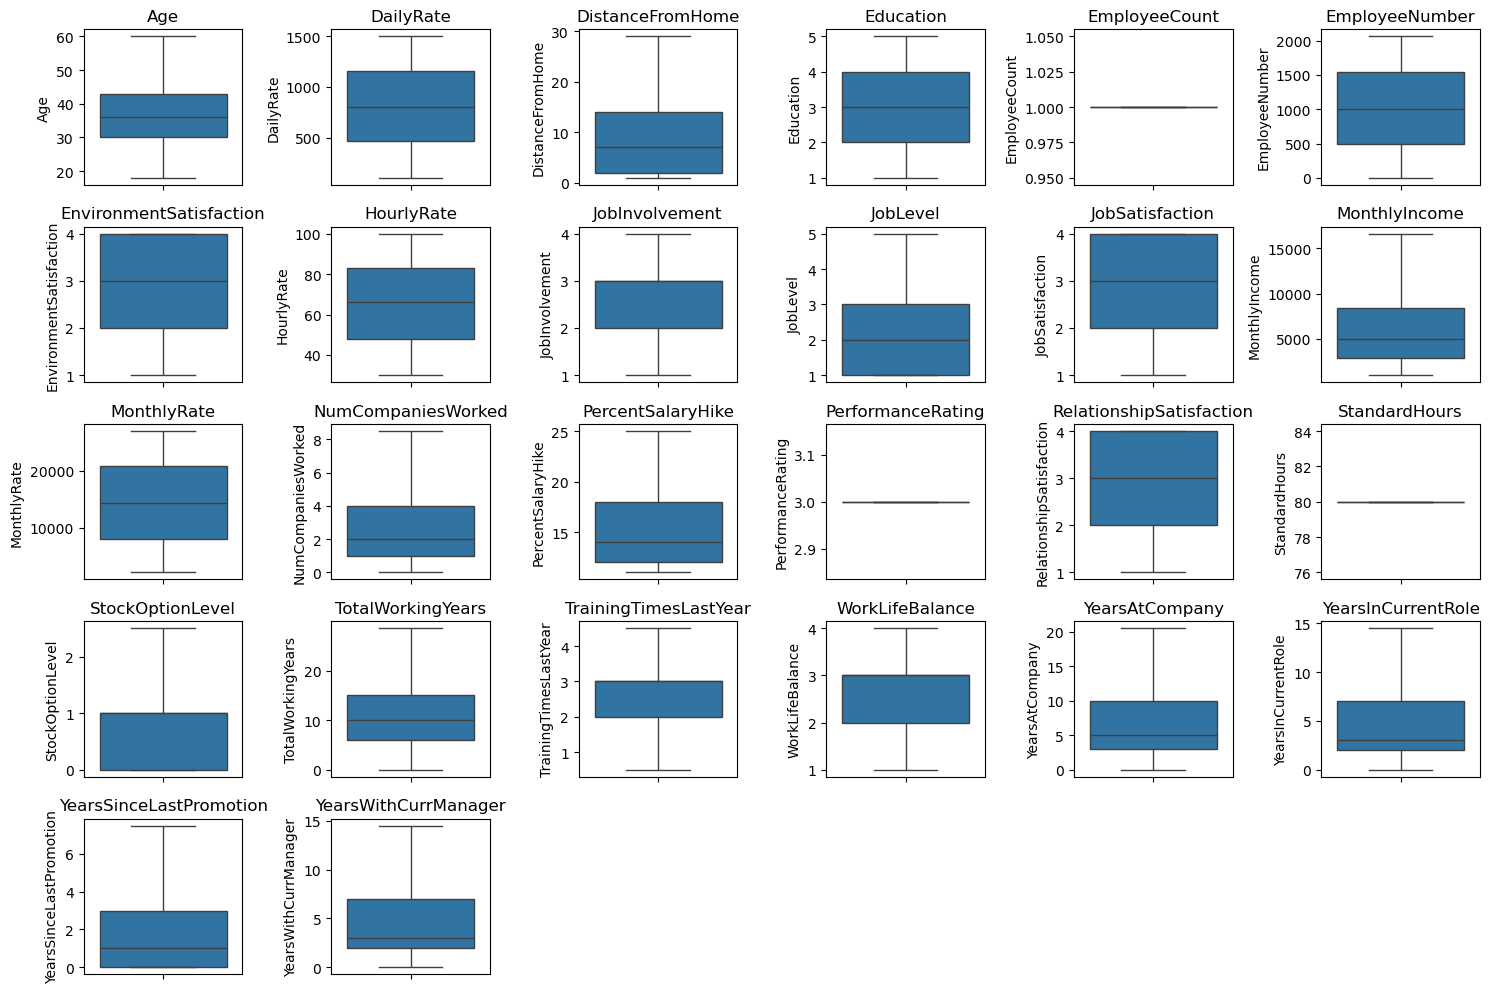

In [36]:
# Check after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

### Transformasi (Erick)

#### *Log Transform*

#### *Standardize*

#### *Normalize*

### Encoding (Bila Perlu) (Erick)

### Preprocessing Pipeline (Perlu Discusi dengan Mentor)

### Imbalance Handling (Hanay data Train) (Erick)

## Modeling

### Library For Modeling

### Train (.fit) And Predict (.predict) Baseline Model

### Hyperparameter Tunning

### Final Model

## Model Evaluation

### Test the Prediction of Final Model

### Evaluation Metrics

### Visualitasion Actual vs Prediction (if needed)